In [251]:
import gmaps
import numpy as np
import pandas as pd
import os
import scipy.stats as st
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import requests
import matplotlib as mpl
mpl.rcParams['font.size'] = 9.0
# # Google developer API key
from config import gkey


# read DataFrame
path = pd.read_csv('../01._Prospective_Project_Data/1._72199_158097_compressed_indeed_job_dataset.csv/indeed_job_dataset_V2_Macro.csv')
df = pd.DataFrame(path)
df
# airport_df = pd.read_csv('../Resources/Airport_Output.csv')
df.fillna(0) 
df


,Unnamed: 0,Job_Title,Link,Queried_Salary,Salary Index,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0.0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1.0,data_scientist,"['SAP', 'SQL']",2.0,Express Scripts,3301.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1.0,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5.0,Money Mart Financial Services,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1.0,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9.0,comScore,62.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1.0,data_scientist,['Certified Internal Auditor'],1.0,Central Intelligence Agency,158.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.0,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1.0,data_scientist,"['Statistical Software', 'Time Management', 'R...",7.0,Federal Reserve Bank of Dallas,495.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,5711.0,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,NaN,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8.0,Jobspring Partners,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5712,5712.0,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,NaN,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13.0,JPMorgan Chase,21159.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5713,5713.0,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,NaN,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15.0,Capital One,6791.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5714,5714.0,Principal Visual Analytics / Big Data Engineer...,https://www.indeed.com/rc/clk?jk=605a2c61478f1...,>160000,NaN,data_engineer,"['JavaScript', 'TS/SCI Clearance', 'XML', 'Had...",11.0,SAIC,2279.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [391]:
# data = {'Salary_Index':  [1,2,3,4,5,6],
#         'Salary_Bracket': ["<80000","80000-99999","100000-119999","120000-139999","140000-159999",">160000"]
#         }

# dfn = pd.DataFrame (data, columns = ['Salary_Index','Salary_Bracket'])

# dfn

,Salary_Index,Salary_Bracket
0,1,<80000
1,2,80000-99999
2,3,100000-119999
3,4,120000-139999
4,5,140000-159999
5,6,>160000


In [252]:
df_cleaned = df.drop(columns=df.columns[(df['No_of_Skills'] == '0').any()])
df_cleaned = df.dropna(subset=['No_of_Skills'])
df_cleaned


/Users/williammdavis/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Unnamed: 0,Job_Title,Link,Queried_Salary,Salary Index,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0.0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1.0,data_scientist,"['SAP', 'SQL']",2.0,Express Scripts,3301.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1.0,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5.0,Money Mart Financial Services,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1.0,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9.0,comScore,62.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1.0,data_scientist,['Certified Internal Auditor'],1.0,Central Intelligence Agency,158.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.0,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1.0,data_scientist,"['Statistical Software', 'Time Management', 'R...",7.0,Federal Reserve Bank of Dallas,495.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710.0,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,NaN,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12.0,Intelliswift Software Inc,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5711,5711.0,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,NaN,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8.0,Jobspring Partners,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5712,5712.0,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,NaN,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13.0,JPMorgan Chase,21159.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5713,5713.0,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,NaN,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15.0,Capital One,6791.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [254]:
# for col in df_cleaned.columns: 
#      print(col) 

# Analysis Stats for Salary vs Job_Type

In [384]:
#stats summary for salary based on job Types 
average=df_cleaned.groupby(['Job_Type']).mean()['Salary Index']
median=df_cleaned.groupby(['Job_Type']).median()['Salary Index']
variance=df_cleaned.groupby(['Job_Type']).var()['Salary Index']
standard_deviation=df_cleaned.groupby(['Job_Type']).std()['Salary Index']
sem=df_cleaned.groupby(['Job_Type']).sem()['Salary Index']

# Created a DF
stats_summary_salary=pd.DataFrame({"Mean Salary Index": average,
                           "Median Salary Index": median,
                           "Salary Index Variance":variance,
                           "Salary Index Std. Dev.":standard_deviation,
                           "Salary Index Std. Err.":sem
                          })



In [385]:
#calculate stats for all job types and add to DF

total_mean=df_cleaned['Salary Index'].mean()
total_median=df_cleaned['Salary Index'].median()
total_variance=df_cleaned['Salary Index'].var()
total_std=df_cleaned['Salary Index'].std()
total_sem=df_cleaned['Salary Index'].sem()

# stats summary by job type 
stats_summary_salary.loc['All Job Type',:] = [total_mean, total_median, total_variance, total_std,total_sem]
# stats_summary_salary=stats_summary_salary['Mean Salary Index'].mean()['Salary_Index']
# stats_summary_salary.replace([1,2,3,4,5,6],["<80000",\
#                                             "80000-99999",\
#                                             "100000-119999",\
#                                             "120000-139999",\
#                                             "140000-159999",\
#                                             ">160000"])

stats_summary_salary


,Mean Salary Index,Median Salary Index,Salary Index Variance,Salary Index Std. Dev.,Salary Index Std. Err.
Job_Type,,,,,
data_analyst,1.000000,1.0,0.000000,0.000000,0.000000
data_engineer,1.000000,1.0,0.000000,0.000000,0.000000
data_scientist,3.891109,4.0,1.378183,1.173960,0.023708
All Job Type,3.294917,3.0,2.462542,1.569249,0.028235


# Analysis Stats for Number of Skills vs Job_Type

In [258]:

#stats summary by # of skills for each job tytle
average=df_cleaned.groupby(['Job_Type']).mean()['No_of_Skills']
median=df_cleaned.groupby(['Job_Type']).median()['No_of_Skills']
variance=df_cleaned.groupby(['Job_Type']).var()['No_of_Skills']
standard_deviation=df_cleaned.groupby(['Job_Type']).std()['No_of_Skills']
sem=df_cleaned.groupby(['Job_Type']).sem()['No_of_Skills']
# max_skills=df_cleaned['No_of_Skills'].max()
# min_skills=df_cleaned['No_of_Skills'].min()

# Created a DF
stats_summary2=pd.DataFrame({"Mean Number of Skills ": average,
                             "Median Number of Skills": median,
                             "Number of Skills Variance":variance,
#                              "Max Number of Skills .":max_skills,
#                              "Min Number of Skills .":min_skills,
                             "Number of Skills Std. Dev.":standard_deviation,
                             "Number of Skills Std. Err.":sem})

#stats summary by # of skills for all jobs

skill_mean=df_cleaned['No_of_Skills'].mean()
skill_median=df_cleaned['No_of_Skills'].median()
min_skills=df_cleaned['No_of_Skills'].min()
max_skills=df_cleaned['No_of_Skills'].max()
skill_variance=df_cleaned['No_of_Skills'].var()
skill_std=df_cleaned['No_of_Skills'].std()
skill_sem=df_cleaned['No_of_Skills'].sem()

# stats summary by job type 
stats_summary2.loc['All Job Type',:] = [skill_mean, skill_median, skill_variance, skill_std,skill_sem]
stats_summary2

,Mean Number of Skills,Median Number of Skills,Number of Skills Variance,Number of Skills Std. Dev.,Number of Skills Std. Err.
Job_Type,,,,,
data_analyst,4.939877,4.0,9.780300,3.127347,0.077461
data_engineer,11.015475,10.0,26.237961,5.122300,0.139051
data_scientist,8.653045,8.0,21.372961,4.623090,0.092536
All Job Type,8.133868,7.0,24.335232,4.933075,0.066621


# Job Vacancy by Industry

In [259]:
#create DF by industry type, salary, and job title 
industry_df=df_cleaned[['Job_Title',\
                       'Queried_Salary',\
                       'Consulting and Business Services',\
                       'Internet and Software',\
                       'Banks and Financial Services',\
                       'Health Care',\
                       'Insurance',\
                       'Other_industries']]
industry_df


,Job_Title,Queried_Salary,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,<80000,0.0,0.0,0.0,1.0,0.0,0.0
1,Data Scientist,<80000,0.0,0.0,0.0,0.0,0.0,0.0
2,Data Scientist,<80000,0.0,0.0,0.0,0.0,0.0,0.0
3,Graduate Studies Program - Data Scientist,<80000,0.0,0.0,0.0,0.0,0.0,1.0
4,Data Scientist I,<80000,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5710,Senior Data Engineer,>160000,0.0,0.0,0.0,0.0,0.0,0.0
5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,0.0,0.0,0.0,0.0,0.0,1.0
5712,Executive Director- Architect: Data Engineerin...,>160000,0.0,0.0,1.0,0.0,0.0,0.0
5713,"Senior Manager, Data Engineering (hands on)",>160000,0.0,0.0,1.0,0.0,0.0,0.0


In [260]:
# fill blanks in industry with other
d=df_cleaned['Company_Industry'].fillna("Other")
e=pd.DataFrame(d)
#count other
count_other=(len(e[e['Company_Industry']=='Other']))


In [261]:
#calculate total nums of industry for each job title
#consulting
consulting_tot=industry_df['Consulting and Business Services'].sum()

#internet & software
internet_tot=industry_df['Internet and Software'].sum()

#banks
banks_tot=industry_df['Banks and Financial Services'].sum()

#health
health_tot=industry_df['Health Care'].sum()

#insurance
insurance_tot=industry_df['Insurance'].sum()



#other industry + unidentified industry
other_tot=(industry_df['Other_industries'].sum())+ count_other


In [262]:
total_postings=industry_df['Consulting and Business Services'].count()
total_postings


5483

In [263]:
#percentage by industry
consult_percent="{:.0%}".format(consulting_tot/total_postings)

internet_percent="{:.0%}".format(internet_tot/total_postings)

banks_percent="{:.0%}".format(banks_tot/total_postings)

health_percent="{:.0%}".format(health_tot/total_postings)

insurance_percent="{:.0%}".format(insurance_tot/total_postings)

# other_percent="{:.0%}".format(other_tot/total_postings)


# percentage_summary=pd.DataFrame({"Count of Consulting Industry": consulting_tot,
#                            "Count of Internet Industry":internet_tot,
#                            "Count of Banks":banks_tot,
#                            "Count of Health":health_tot,
#                            "Count of Insurance":insurance_tot,
#                             "Count of Other":other_tot },index=[0])
# percentage_summary
data={'Industries':["Consulting and Business Services",\
                    "Internet and Software",\
                    "Banks and Financial Services",\
                    "Health Care",\
                    "Insurance",\
                    "Other Industries"],'Vacancy_count':[consulting_tot,internet_tot,banks_tot,health_tot,insurance_tot,other_tot]}
summary_df = pd.DataFrame(data)
summary_df['Vacancy_count'].astype(float)

0     712.0
1     620.0
2     455.0
3     306.0
4     214.0
5    3176.0
Name: Vacancy_count, dtype: float64

In [264]:
subset=summary_df.set_index('Industries')
subset
# plot = summary_df.plot.pie(subplots=True, figsize=(11, 6))

,Vacancy_count
Industries,
Consulting and Business Services,712.0
Internet and Software,620.0
Banks and Financial Services,455.0
Health Care,306.0
Insurance,214.0
Other Industries,3176.0


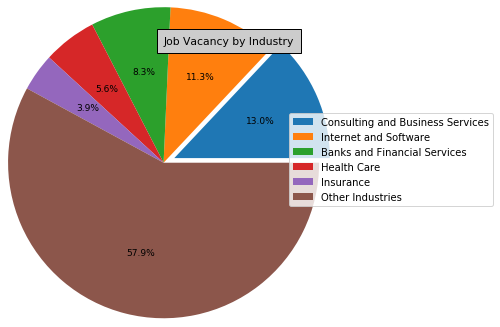

In [265]:
explode=(0.15, 0, 0.0, 0, 0,0)
tots=summary_df['Vacancy_count']
title = plt.title("Job Vacancy by Industry",bbox={'facecolor':'0.8', 'pad':7})
title.set_ha("left")
plt.gca().axis("equal")
pie = plt.pie(tots, startangle=0,autopct='%1.1f%%',radius=2,explode=explode)
labels=summary_df['Industries']
plt.legend(labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.savefig('../04._Output/industrypie.png')

In [266]:
# explode=(0.15, 0, 0.0, 0, 0,0) 
# subset.plot.pie(y='Vacancy_count',\
#                 figsize=(5, 5),\
#                 radius=1,\
#                 textprops={'fontsize': 10},\
#                 autopct='%1.1f%%',\
#                 startangle=90,\
#                 pctdistance=0.7,\
#                 labeldistance=1.1,\
#                 explode=explode)

# ax=plt.subplot()

# ax.legend(loc='lower right',bbox_to_anchor=(2, 0, 0, 5))



# plt.savefig('../04._Output/industrypie.png')
# #text size

# Highest Paying Industry

In [267]:
#filter by highest pay 
high_pay_industry=industry_df[industry_df['Queried_Salary']== '>160000']
high_pay_industry


,Job_Title,Queried_Salary,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
2312,"Data Scientist, Personalization",>160000,0.0,0.0,0.0,0.0,0.0,1.0
2313,Data Scientist,>160000,0.0,0.0,0.0,0.0,0.0,0.0
2314,Data Scientist,>160000,0.0,0.0,0.0,0.0,0.0,1.0
2315,Data Scientist,>160000,0.0,1.0,0.0,0.0,0.0,0.0
2316,Data Scientist,>160000,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
5710,Senior Data Engineer,>160000,0.0,0.0,0.0,0.0,0.0,0.0
5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,0.0,0.0,0.0,0.0,0.0,1.0
5712,Executive Director- Architect: Data Engineerin...,>160000,0.0,0.0,1.0,0.0,0.0,0.0
5713,"Senior Manager, Data Engineering (hands on)",>160000,0.0,0.0,1.0,0.0,0.0,0.0


In [268]:
#calculate total nums of industry for each job title
#consulting
consulting=high_pay_industry['Consulting and Business Services'].sum()

#internet & software
internet=high_pay_industry['Internet and Software'].sum()

#banks
banks=high_pay_industry['Banks and Financial Services'].sum()

#health
health=high_pay_industry['Health Care'].sum()

#insurance
insurance=high_pay_industry['Insurance'].sum()

#other industry
other2=high_pay_industry['Other_industries'].sum()+ count_other


In [269]:
total_industry=consulting+internet+banks+health+insurance+other
total_industry

2062.0

In [270]:
#percentage by industry
consult_percentage="{:.0%}".format(consulting/total_postings)

internet_percentage="{:.0%}".format(internet/total_postings)

banks_percentage="{:.0%}".format(banks/total_postings)

health_percentage="{:.0%}".format(health/total_postings)

insurance_percentage="{:.0%}".format(insurance/total_postings)

other_percentage="{:.0%}".format(other/total_postings)


# percentage_summary=pd.DataFrame({"Count of Consulting Industry": consulting_tot,
#                            "Count of Internet Industry":internet_tot,
#                            "Count of Banks":banks_tot,
#                            "Count of Health":health_tot,
#                            "Count of Insurance":insurance_tot,
#                             "Count of Other":other_tot },index=[0])
# # percentage_summary
# data2={'Industries':["Consulting and Business Services",\
#                     "Internet and Software",\
#                     "Banks and Financial Services",\
#                     "Health Care",\
#                     "Insurance",\
#                     "Other Industries"],'Totals':[consulting,internet,banks,health,insurance,other2]}
# summary_df2 = pd.DataFrame(data2)
# summary_df2


In [271]:
# explode=(0.15, 0, 0.0, 0, 0,0)
# totals=summary_df2['Totals']
# title = plt.title("Highest Pay Job Vacancy by Industry",bbox={'facecolor':'0.8', 'pad':7})
# title.set_ha("left")
# plt.gca().axis("equal")
# pie = plt.pie(totals, startangle=0,autopct='%1.1f%%',radius=2,explode=explode)
# labels=summary_df2['Industries']
# plt.legend(labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
#            bbox_transform=plt.gcf().transFigure)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
# plt.savefig('../04._Output/highpayindustrypie1.png')

In [272]:
#analyze vacancy for highest paying jobs by industry
data3={'Industries':["Consulting and Business Services",\
                    "Internet and Software",\
                    "Banks and Financial Services",\
                    "Health Care",\
                    "Insurance"],'Totals':[consulting,internet,banks,health,insurance,]}
summary_df3 = pd.DataFrame(data3)
summary_df3


,Industries,Totals
0,Consulting and Business Services,80.0
1,Internet and Software,50.0
2,Banks and Financial Services,41.0
3,Health Care,4.0
4,Insurance,8.0


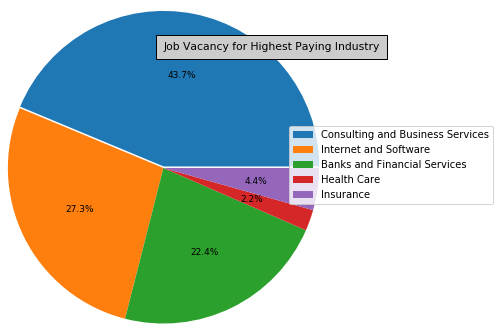

In [393]:
explode=(0.02, 0, 0.0, 0, 0)
totals=summary_df3['Totals']
title = plt.title("Job Vacancy for Highest Paying Industry",bbox={'facecolor':'0.8', 'pad':7})
title.set_ha("left")
plt.gca().axis("equal")
pie = plt.pie(totals, startangle=0,autopct='%1.1f%%',radius=2,explode=explode)
labels=summary_df2['Industries']
plt.legend(labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.savefig('../04._Output/highpayindustrypie2.png')

# Job Availability By Company

In [274]:
# total_no_cities=df["Location"].unique()
# total_no_cities clean
# city_index = (df_cleaned[ df_cleaned['Location'] == 'REMOTE' ].index)
# df_cleaned.drop(city_index, inplace=True)

# city_index = (df_cleaned[ df_cleaned['Location'] == 'USA' ].index)
# df_cleaned.drop(city_index, inplace=True)
# city_index

/Users/williammdavis/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Int64Index([  48,  118,  147,  162,  301,  307,  347,  456,  464,  530,  637,
             754,  943, 1012, 1024, 1028, 1138, 1165, 1217, 1270, 1325, 1345,
            1404, 1414, 1447, 1449, 1488, 1547, 1646, 1781, 1977, 2092, 2139,
            2143, 2192, 2203, 2221, 2232, 2453, 2583, 2589, 2594, 2596, 2811,
            2847, 3277, 3396, 3424, 3450, 3457, 3508, 3724, 3875, 3953, 4054,
            4067, 4181, 4213, 4222, 4256, 4491, 4543, 4612, 4670, 4676, 5101,
            5126, 5495],
           dtype='int64')

In [54]:
city_index2 = df_cleaned[ df_cleaned['Location'] == 'nan' ].index
df_cleaned.drop(city_index2, inplace=True)


In [55]:
df_cleaned.dropna(subset=['Location'], inplace=True)


/Users/williammdavis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Job vancancy/demand by state and company-Top 10

There are a total of 2162 job openings


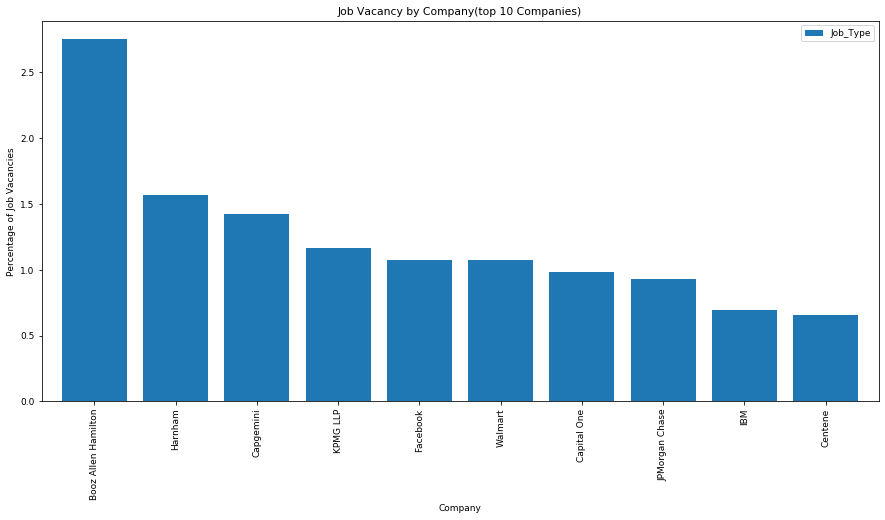

<Figure size 432x288 with 0 Axes>

In [221]:
# #find company with most job listings(top 10)
num_company=df_cleaned['Company'].nunique()
print(f'There are a total of {num_company} job openings')

most_job_openings= df_cleaned.groupby(['Company'])['Job_Type'].count()
ratio=most_job_openings/total_postings*100

top_company=pd.DataFrame(ratio.nlargest(10))
top_company

#plot
plot=top_company.plot(kind='bar', align="center",figsize = (15,7),width = 0.8)
plt.title("Job Vacancy by Company(top 10 Companies)")
plt.ylabel('Percentage of Job Vacancies')
plt.show()

plt.savefig('../04._Output/jobvacancybycompanybar.png')

# Jobs By State

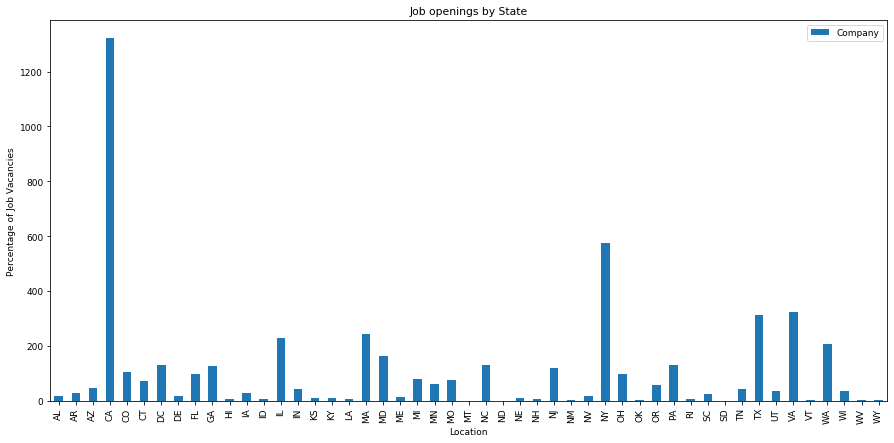

<Figure size 432x288 with 0 Axes>

In [302]:
#all states
job_count_city=df_cleaned.groupby(['Location'])['Company'].count()
ratio2=job_count_city/total_postings*100
state_df=pd.DataFrame(ratio2)

#plot bar
plot=state_df.plot(kind='bar', align="center",figsize = (15,7))
plt.title('Job openings by State')
plt.ylabel('Percentage of Job Vacancies')
plt.show()
plt.savefig('../04._Output/job_vacancy_by_allstates.png')


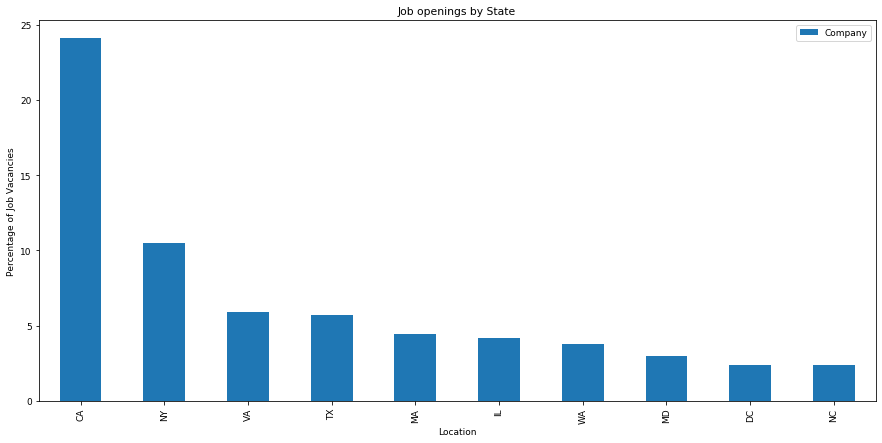

<Figure size 432x288 with 0 Axes>

In [231]:
#top 10 states
state_df2=pd.DataFrame(ratio2.nlargest(10))

##plot bar
plot=state_df2.plot(kind='bar', align="center",figsize = (15,7))
plt.title('Job openings by State')
plt.ylabel('Percentage of Job Vacancies')
plt.show()
plt.savefig('../04._Output/job_vacancy_by_topstates.png')

# Map Where The Jobs are 

In [318]:
# Jobs By Industry

industry_df=pd.DataFrame(df_cleaned.loc[:,['Location',\
                                    'Consulting and Business Services',\
                                    'Internet and Software',\
                                    'Banks and Financial Services',\
                                    'Health Care',\
                                   'Insurance',\
                                    'Company']])
industry_df.dropna()

industry_df
map_industry=industry_df.groupby(['Location'])['Company'].count()

map_df=pd.DataFrame(map_industry)
grouped_map=map_df.reset_index()


In [328]:
grouped_map.head()

,Location,Company,Lat,Lng
0,AL,16,,
1,AR,27,,
2,AZ,48,,
3,CA,1321,,
4,CO,104,,


In [349]:
#create df by state with lat and lng columns
grouped_map["Lat"] = ""
grouped_map["Lng"] = ""
grouped_map.groupby(['Location'])

#drop remote cities and USA


state_bylocation=pd.DataFrame(grouped_map)
#state_bylocation.dtypes



In [350]:
params = {"key": gkey}
# max_rows=200
# Loop through the location and run a lat/long search for each city
for index, row in state_bylocation.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    state = row['Location']
    

    # update address key value
    params['address'] = f"{state}"

#     # make request
    state_lat_lng = requests.get(base_url, params=params)

#     # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
#     print(state_lat_lng.url)
    
# #     # convert to json
    state_lat_lng = state_lat_lng.json()
#     print(state_lat_lng['results'][0]['geometry']['location'])
#     time.sleep(1.00)

    state_bylocation.loc[index, "Lat"] = state_lat_lng["results"][0]['geometry']["location"]["lat"]
    state_bylocation.loc[index,'Lng']= state_lat_lng["results"][0]['geometry']["location"]["lng"]
#     if index >max_rows and max_rows>0:
#         break

#change lat and lng to float 
state_bylocation[["Lat","Lng"]].astype(float)
# summary_df['Vacancy_count'].astype(float)
state_bylocation.head()

,Location,Company,Lat,Lng
0,AL,16,32.3182,-86.9023
1,AR,27,35.2011,-91.8318
2,AZ,48,34.0489,-111.094
3,CA,1321,36.7783,-119.418
4,CO,104,37.0366,-95.6714


In [398]:
locations=state_bylocation[['Lat','Lng']]
fig = gmaps.figure(map_type="TERRAIN")

heat_layer = gmaps.heatmap_layer(locations, weights=state_bylocation['Company'], 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
fig.add_layer(heat_layer)
## State Label Marker
# state_template="""<dl><dd>{Location}</dd></dl>"""
# state_info=[state_template.format(**row) for index,row in state_bylocation.iterrows()]
# marker_layer=gmaps.marker_layer(locations,info_box_content= state_info)
# fig.add_layer(marker_layer)

plt.savefig('../04._Output/company_concentrationmap.png')
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

# Highest Pay by State  ( >160000)

In [354]:
salary_df=pd.DataFrame(df_cleaned.loc[:,['Location',\
                                    'Salary Index']])

salary_df.dropna()

salary_df.head()

,Location,Salary Index
0,MO,1.0
1,TX,1.0
2,OR,1.0
3,DC,1.0
4,TX,1.0


In [356]:
#highest pay only
high_pay_salary=salary_df[salary_df['Salary Index']== 6]
high_pay_salary.head()

,Location,Salary Index
2312,OR,6.0
2313,NY,6.0
2314,CA,6.0
2315,CA,6.0
2316,NY,6.0


In [359]:
#salary index count by state
pay_count= high_pay_salary.groupby(['Location'])['Salary Index'].count()
pay_df=pd.DataFrame(pay_count)
pay_df.head()

,Salary Index
Location,
CA,122
CO,2
CT,1
DC,2
FL,1


In [360]:
#add columns for lat and lng
pay_df["Lat"] = ""
pay_df["Lng"] = ""
pay_df.groupby(['Location'])
pay_bylocation=pd.DataFrame(pay_df)

pay_bylocation.reset_index(inplace=True)
pay_bylocation.head()


,Location,Salary Index,Lat,Lng
0,CA,122,,
1,CO,2,,
2,CT,1,,
3,DC,2,,
4,FL,1,,


In [361]:
params = {"key": gkey}
# Loop through the location and run a lat/long search for each city
for index, row in pay_bylocation.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    states = row['Location']
    

    # update address key value
    params['address'] = f"{states}"

#     # make request
    states_lat_lng = requests.get(base_url, params=params)

#     # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
#     print(state_lat_lng.url)
    
# #     # convert to json
    states_lat_lng = states_lat_lng.json()
#     print(state_lat_lng['results'][0]['geometry']['location'])
#     time.sleep(1.00)

    pay_bylocation.loc[index, "Lat"] = states_lat_lng["results"][0]['geometry']["location"]["lat"]
    pay_bylocation.loc[index,'Lng']= states_lat_lng["results"][0]['geometry']["location"]["lng"]
#     if index >max_rows and max_rows>0:
#         break
pay_bylocation.head()

,Location,Salary Index,Lat,Lng
0,CA,122,36.7783,-119.418
1,CO,2,37.0366,-95.6714
2,CT,1,41.6032,-73.0877
3,DC,2,38.9072,-77.0369
4,FL,1,27.6648,-81.5158
5,IL,2,40.6331,-89.3985
6,MA,10,42.4072,-71.3824
7,MD,1,39.0458,-76.6413
8,MI,1,37.1657,-95.1072
9,NC,1,35.7596,-79.0193


In [375]:
location=pay_bylocation[['Lat','Lng']]
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(location, weights=pay_bylocation['Salary Index'], 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 2)
fig.add_layer(heat_layer)
state_template="""<dl><dd>{Location}</dd></dl>"""
pay_info=[state_template.format(**row) for index,row in pay_df.iterrows()]
# print(state_info)
marker_layer=gmaps.marker_layer(location,info_box_content= pay_info)
fig.add_layer(marker_layer)
fig
plt.savefig('../04._Output/high_pay_concentration_map.png')
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [355]:
#job_type by salary_index table 